# Intuition

Recently my main analysis tool was switched to python, a language that I have not touched for a year. It has never been my first choice for most of data analysis tasks simply because I could not find a GUI that is interactive enough to prototype my ideas fast; however while working on development, python is still on my top list.

As a data scientist I hate the feeling that I become pretty clumsy to visualize data using python. While ggplot is still my favourite visualization tool, I want to ramp up a bit on some plotting tools available in python. To be better at using visualization tool, nothing but just practice. As a user of these tools I don't see there are many technical skills invloved; however understanding the workflow and layer structure of the tool is the key. By writting this post, I wish I can get more familiar with the syntax and hope this could help others as well.

Below are some popular visualization APIs availabe in python, but I'm going to only use the first 3:
* [matplotlib](http://matplotlib.org/)
* [pandas](http://pandas.pydata.org/) 
* [seaborn](http://stanford.edu/~mwaskom/software/seaborn/)
* [boekh](http://bokeh.pydata.org/en/latest/)
* [ggplot](http://ggplot.yhathq.com/)
* [plotly](https://plot.ly/)


In [1]:
import pandas as pd
import numpy as np
import datetime
import random
import calendar
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

## Generate a dummy dataset

The dataset contains two time series values in daily level.

In [2]:
def get_monday(date, format = '%Y-%m-%d'):
    ts = datetime.datetime.strptime(date, format)
    mon_ts = ts - datetime.timedelta(days=int(ts.strftime('%w')) - 1) 
    return mon_ts.strftime(format)

In [3]:
n = 100
np.random.seed(111)

ts = pd.date_range(pd.datetime.today(), periods=n)
day = ts.strftime('%Y-%m-%d')
week = [get_monday(d) for d in day]
wday = ts.strftime('%A')
category = [random.choice(['A', 'B', 'C']) for x in range(n)]
value1 = [10 + 2 * x + float(np.random.normal(0, n**0.5, 1)) for x in range(n)]
value2 = [10 + 1.5 * x + float(np.random.normal(0, n**0.7, 1)) for x in range(n)]

df = pd.DataFrame({
    "ts": ts,
    "day": day,
    "week": week,
    "wday": wday,
    "category": category,
    "value1": value1,
    "value2": value2,
})

## Pandas' build-in plotting

Pandas DataFrame and Series has .plot namespace and there are many ployt types available such as hist, line, scatter , barchart and etc. This is definitely provides a quickest way to vizulize the data, epecially when exploring a DataFrame object. 

Below are couple simple examples to demo its syntax. Please review <a href='http://pandas.pydata.org/pandas-docs/stable/visualization.html'> Pandas visualization documentation </a> for more detailed explanation.

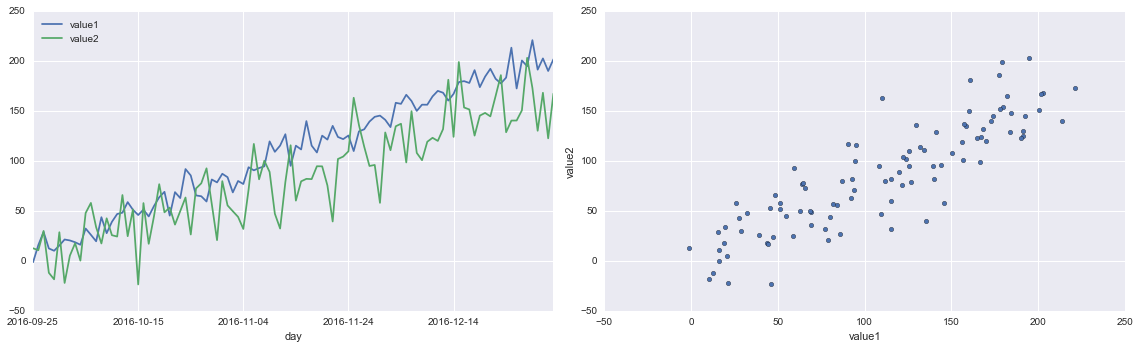

In [4]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=[16,5])

df.plot.line(ax=ax[0], x = 'day', y = ['value1', 'value2'])
df.plot.scatter(ax=ax[1], x = 'value1', y = 'value2')
plt.tight_layout()

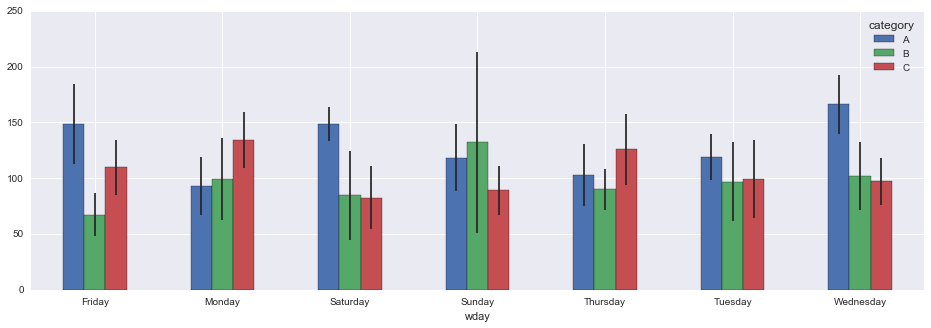

In [5]:
dfg = df.groupby(['wday', 'category'])['value1'].agg([np.mean, np.std, np.count_nonzero])
dfg['mean_std'] = dfg['std'] / np.sqrt(dfg['count_nonzero'] )

fig, ax = plt.subplots(figsize=[16,5])
_ = dfg.unstack().plot(ax = ax, y = 'mean', kind = 'bar', yerr='mean_std', ylim=(0,250))
_ = ax.set_xticklabels(sorted(df.wday.unique()), rotation=0)

## Matplotlib

Many python visualization APIs are built on top of Matplotlib, so being good at it is a must. As it is the base of other tools, it provides the most flexible tunning options. Most of the elements in a plot are tunable if you want, making it very powerful for customized plots. Please review <a href='http://matplotlib.org/contents.html'> Matplotlib documentation</a> for more detailed explanation.

For example, we can make a similar plot as above one using a longer way but with more user customization using matplotlib. The data has two key columns (multi-indexed). The way below is to make x-axis as one of the key column, and loop through each unique value of the other key column. While looping, we can customize each group of bars the way we want.

In [6]:
def gen_ax_bar(ax, data, group, metric, y_col, std_col = None, width = 0.25, 
               color=['c', 'g', 'y'], xlab='', ylab='', title='',xticklabel=''):
    
    group_values = data[group].unique()
    metric_values = data[metric].unique()
    
    axes = []
    for i in range(len(metric_values)):
        d = data.loc[lambda x: x[metric] == metric_values[i], :]
        width = width
        ind = np.arange(d.shape[0]) + width * (i)
        y = d[y_col]
        if std_col is not None:
            std = list(d[std_col])
        
        axes.append(ax.bar(ind, y, width, 
                        color=color[i],
                        yerr=std,
                        error_kw={'ecolor':'black', 'linewidth':1}))
        
    ax.legend(axes, metric_values)
    ax.set(xticks=ind, 
           xticklabels=group_values, 
           ylabel=ylab, 
           xlabel=xlab, 
           title=title)
    return ax

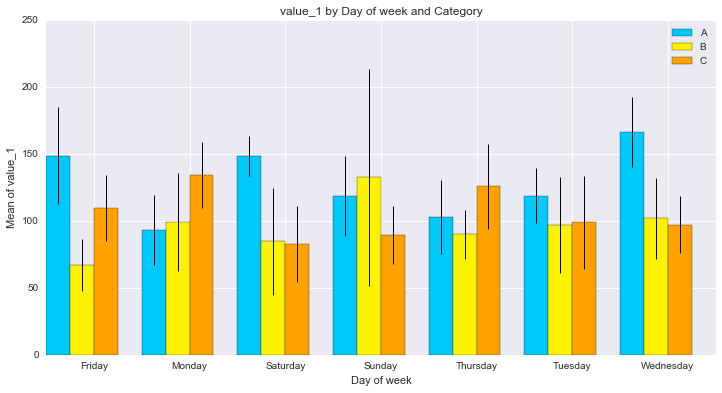

In [7]:
df_plt = dfg.reset_index()
fig, ax = plt.subplots(figsize = [12,6])

_ = gen_ax_bar(ax, df_plt, 'wday', 'category', 'mean', 'mean_std', 
               color = ['#00C8F8', '#FDF200', '#FFA200'],
               xlab = 'Day of week',
               ylab = 'Mean of value_1',
               title = 'value_1 by Day of week and Category'
          )
_ = ax.set_ylim([0, 250])

## Seaborn

Seaborn is highly integrated with matplotlib and pandas' build-in plotting and it is pretty flexible and powerful. You can make an attractive plot with just a few lines of code. It also provides many built-in style options. Please review <a href='https://stanford.edu/~mwaskom/software/seaborn/'> Seaborn documentation</a> for more detailed explanation.

One thing I don't like it is that its plotting functions seem to do too many things, i.e. one function does more than one thing. This somehow makes it hard to be customized. 

Here is an example that make a simliar bar chart with only couple line of code. Notes that the default will add bootstrapped error bands (good or bad?), which is not the same as the standard error used above.

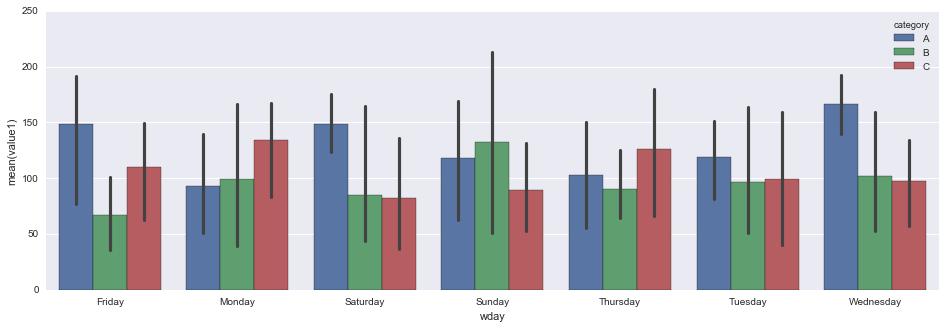

In [8]:
fig, ax = plt.subplots(figsize=[16, 5])
_ = sns.barplot(data=df, x='wday', y='value1', hue='category', n_boot=1000,
                order = sorted(df.wday.unique()),
                hue_order=['A', 'B', 'C'])
_ = ax.set_ylim([0, 250])

More examples to show how easy to make a look-like fancy plot using Seaborn.

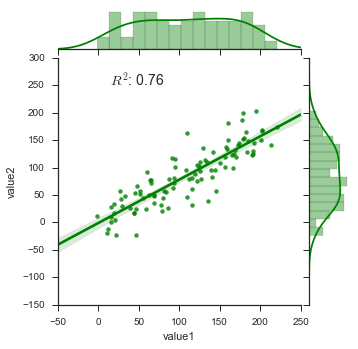

In [9]:
sns.set(style="ticks")
fig = sns.JointGrid(data=df, x='value1', y='value2', size=5)
_ = fig.plot_joint(sns.regplot, color='g')
_ = fig.plot_marginals(sns.distplot, color='g', bins=15)
_ = fig.annotate(lambda r,p: stats.pearsonr(r,p)[0]**2, fontsize=14,
                 template='{stat}: {val:.2f}', stat='$R^2$', loc='upper left')

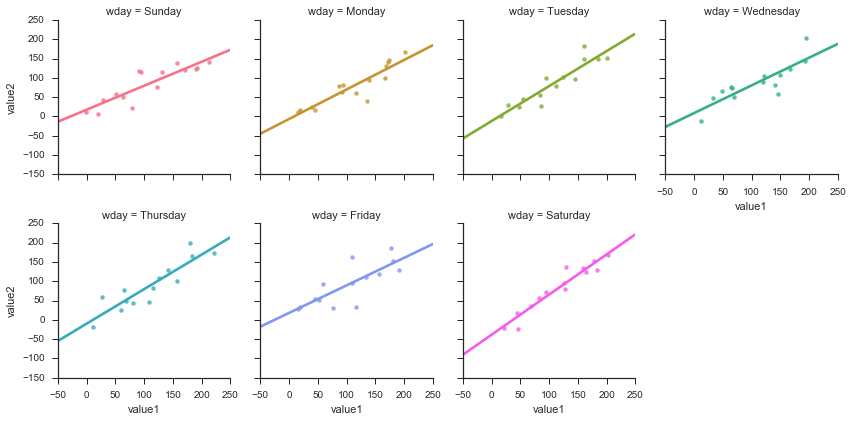

In [10]:
fig = sns.FacetGrid(df, col='wday', hue='wday', col_wrap=4)
_ = fig.map(sns.regplot, 'value1', 'value2', ci=None, order=1)

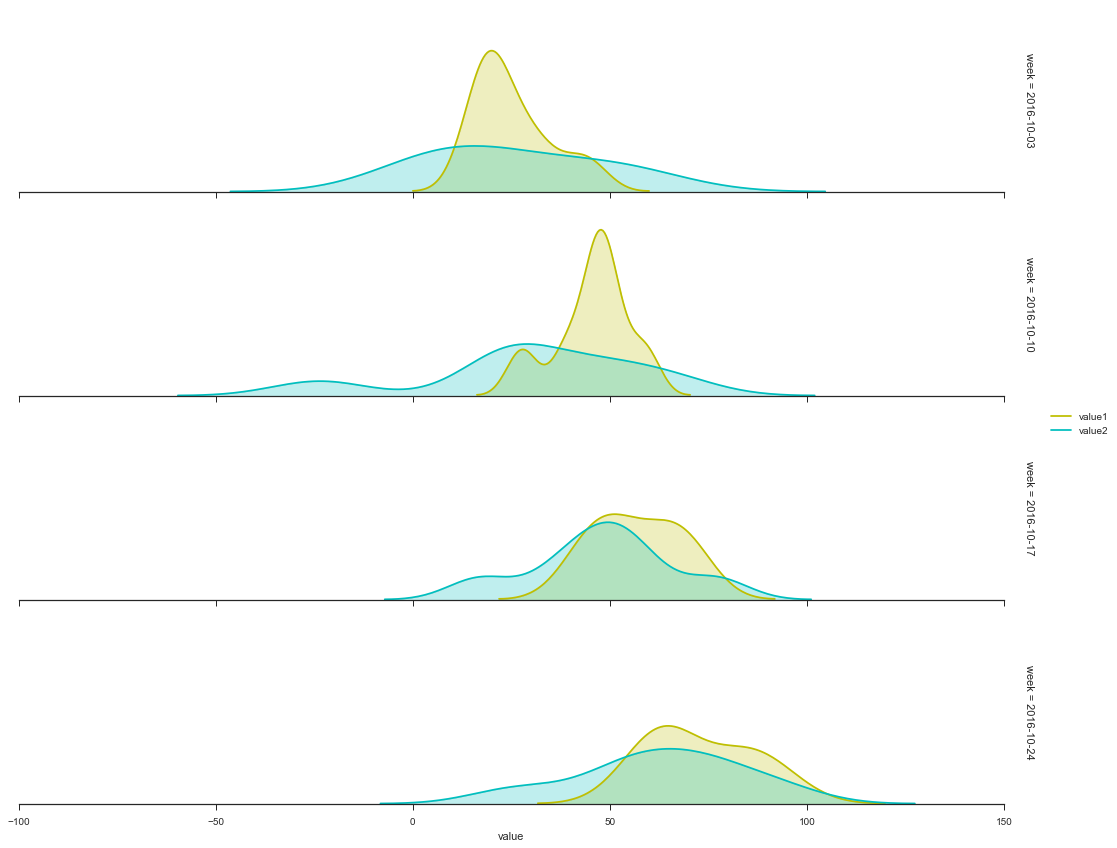

In [11]:
fig = sns.FacetGrid(df[df.week > min(df.week)][0:min(n, 4*7)], row = 'week', aspect=5, margin_titles=True)
_ = fig.map(sns.kdeplot, 'value1', shade=True, color='y')
_ = fig.map(sns.kdeplot, 'value2', shade=True, color='c')
_ = fig.set_xlabels('value')
_ = fig.add_legend()
for ax in fig.axes.flat:
    ax.yaxis.set_visible(False)
fig.fig.subplots_adjust(hspace=0.1)
sns.despine(left=True)

In [12]:
iris = sns.load_dataset("iris")

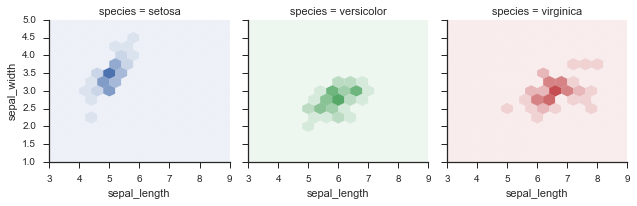

In [13]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=15, cmap=cmap, **kwargs)

fig = sns.FacetGrid(data=iris, hue='species', col='species')
_ = fig.map(hexbin, 'sepal_length', 'sepal_width', extent=[3,9,1,5])

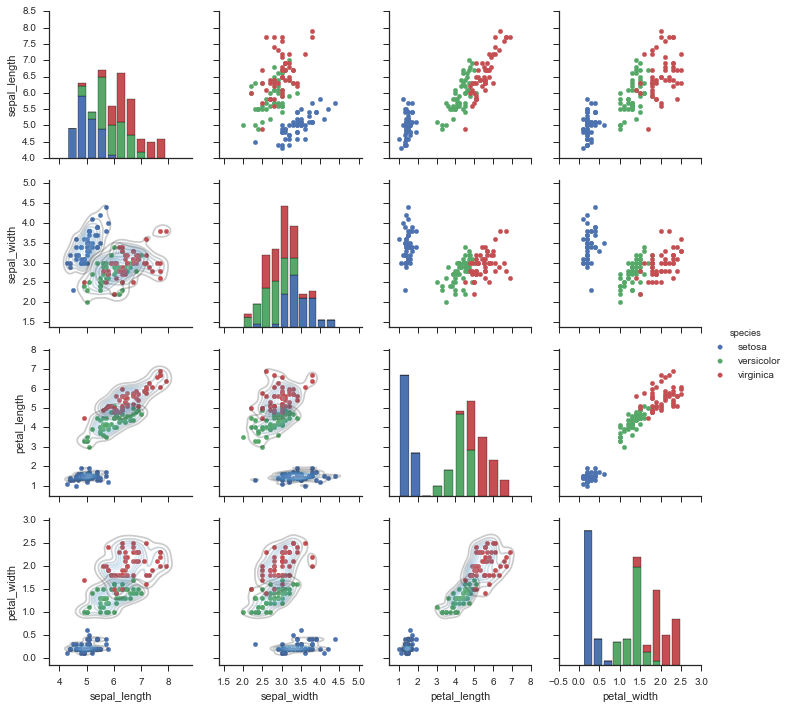

In [14]:
fig = sns.PairGrid(iris, hue='species')
_ = fig.map_diag(plt.hist)
_ = fig.map_offdiag(plt.scatter)
_ = fig.map_lower(sns.kdeplot, cmap="Blues_d" , alpha=0.25)
_ = fig.add_legend()

## In practice

When and where do we need data visualization in building model?
1. **Data exploration** This is in the early stage when we don't know much about the data. There some fundemental rule of how to pick an appropriate type of plot, e.g. numeric (scatter, line, boxplot, histogram and etc), and categorical (barplot, pie and etc). 

2. **Model selection** In this stage we usually plot values of different paremeters or model performance measurement values by iteration or something like that. 

3. **Model performance** To plot things like feature importance, model performance measurement of the final model.

4. **Conclusion and findings** To make attractive plots of whatever that can catch audience's attention. Would be worth to spend more time on customization since these plots will be probably on the final output or presentation.

Here is a quick example, using GBM to classify survival status on titanic data.

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV

In [16]:
def gen_param_scores(CV_fitted):
    est = CV_fitted
    scores = est.grid_scores_
    rows = []
    params = sorted(scores[0].parameters)

    for row in scores:
        mean = row.mean_validation_score
        std = row.cv_validation_scores.std()
        rows.append([mean, std] + [row.parameters[k] for k in params])
    scores = pd.DataFrame(rows, columns=['score_mean', 'score_std'] + params)
    return scores

In [17]:
titanic = sns.load_dataset('titanic')

#### Data Exploration

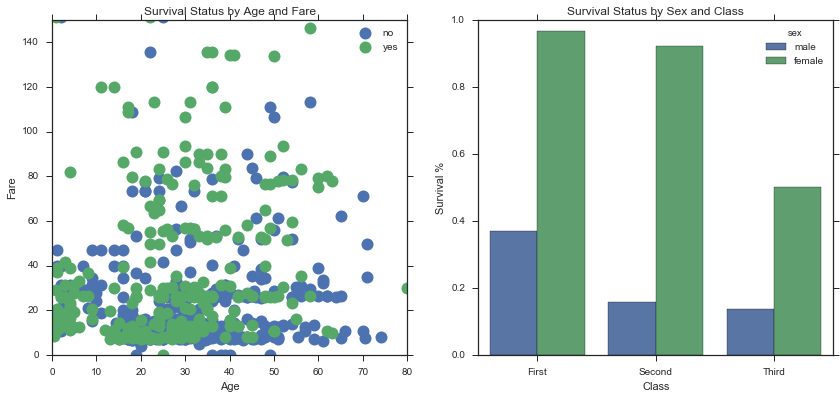

In [18]:
titanic_g = titanic.groupby(['alive'])
fig, ax = plt.subplots(1, 2, figsize=[14, 6])
for name, group in titanic_g:
     ax[0].plot(group.age, group.fare, marker='o', linestyle='', ms=12, label=name)
_ = ax[0].legend(numpoints=1, loc='upper right')
_ = ax[0].set(xlabel='Age', ylabel='Fare', ylim=[0,150], title='Survival Status by Age and Fare')

_ = sns.barplot(data=titanic, x='class', y='survived', hue='sex', ax=ax[1], ci=None)
_ = ax[1].set(xlabel='Class', ylabel='Survival %', title='Survival Status by Sex and Class')

#### Model / parameters selection

In [19]:
clf = GradientBoostingClassifier()
param_grid = dict(
    max_depth=[1, 2, 5, 10, 15, 20],
    min_samples_split=[2, 5, 10],
    min_samples_leaf=[2,3,4,5],
)
est = GridSearchCV(clf, param_grid=param_grid, n_jobs=4)

y = titanic['survived']
X = titanic.drop(['survived', 'who', 'alive'], axis=1)
X = pd.get_dummies(X).fillna(value=X.median())
tmp = est.fit(X, y)

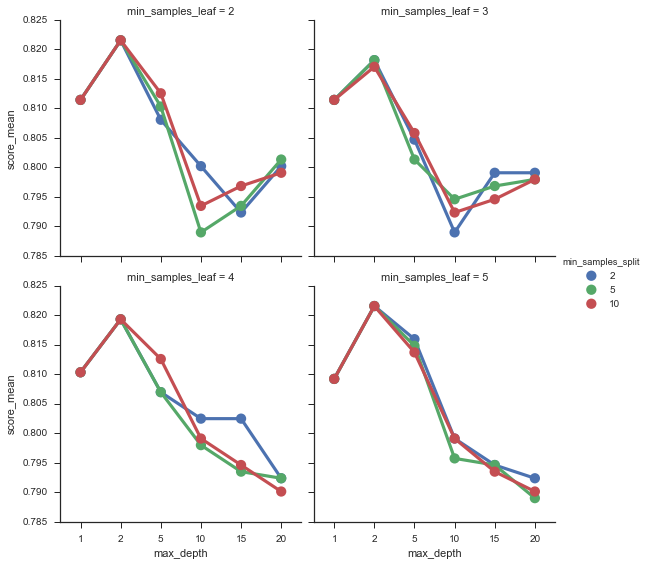

In [20]:
score_table = gen_param_scores(est)
params = score_table.columns[2:]
fig = sns.factorplot(x=params[0], y='score_mean', data=score_table, col=params[1], hue=params[2], col_wrap=2)

In [21]:
max_score = score_table.sort_values('score_mean', ascending=False).head(1)
params_selected = max_score[params]
print max_score

    score_mean  score_std  max_depth  min_samples_leaf  min_samples_split
22    0.821549   0.013746          2                 5                  5


In [22]:
clf = GradientBoostingClassifier(
    max_depth=int(params_selected['max_depth']),
    min_samples_leaf=int(params_selected['min_samples_leaf']),
    min_samples_split=int(params_selected['min_samples_split'])
)

#### Model performance

In [23]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_curve, precision_recall_curve, auc

def plot_model_perf_curve(x, y , auc, xlab='', ylab='', title='', legend_loc='lower right', diag_line=True):
    plt.figure()
    plt.plot(x, y, label='Area Under the Curve (area = %0.2f)' % auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    plt.legend(loc=legend_loc)
    if diag_line:
        plt.plot([0, 1], [0, 1], 'k--')
    return plt.show()

In [24]:
test_pct = 0.3
random_state = np.random.RandomState(1)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=test_pct, random_state=random_state)
_ = clf.fit(X_train, y_train)

y_score = clf.decision_function(X_test)

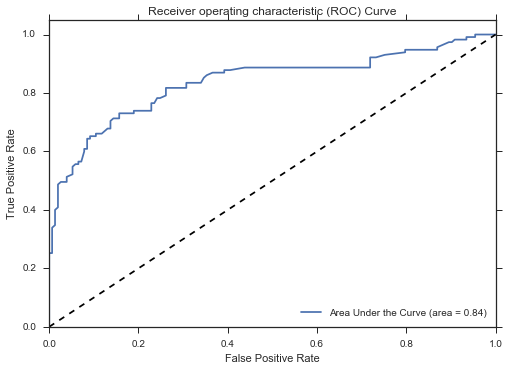

In [25]:
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plot_model_perf_curve(fpr, tpr, auc=roc_auc, 
                      xlab='False Positive Rate', 
                      ylab='True Positive Rate',
                      title='Receiver operating characteristic (ROC) Curve')

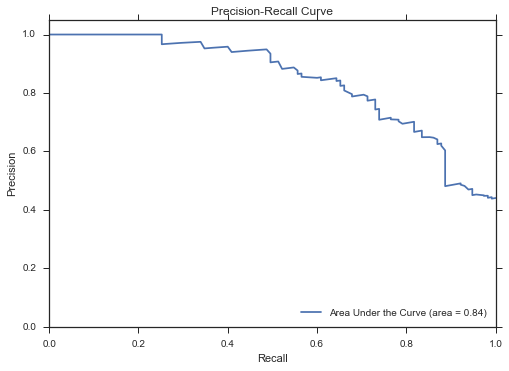

In [26]:
precision, recall, _ = precision_recall_curve(y_test, y_score)
pr_auc = auc(recall, precision)
plot_model_perf_curve(recall, precision, auc=pr_auc, diag_line=False,
                      xlab='Recall', 
                      ylab='Precision',
                      title='Precision-Recall Curve')

In [27]:
def plot_feature_importances(values, labels, xlab='Relative Importance', ylab='', title='Feature Importance'):
    relative_importance = values / max(values) * 100
    sorted_idx = np.argsort(relative_importance)
    pos = np.arange(sorted_idx.shape[0]) + 0.5
    plt.subplot(1, 2, 2)
    plt.barh(pos, relative_importance[sorted_idx], align='center')
    plt.yticks(pos, [labels[i] for i in sorted_idx])
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    return plt.show()

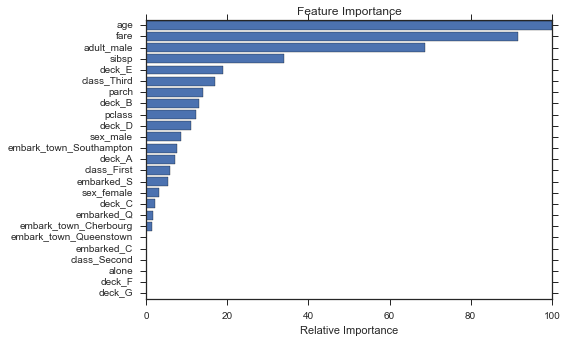

In [28]:
plt.subplots(figsize=[16,5])
plot_feature_importances(clf.feature_importances_, X.columns.values)

## Conlusion

I only showed pandas' built-in, matplotlib and seaborn here and others should be similar. I still feel like they are somehow mixed together without a very standardized syntax. 

Here is probably my temporary rule on how to pick the right tool until I have a better understanding. For a quick view, use panda's built-in first if it is intuitive enough. If not, spend some time on matplotlib. If the data is in a good shape and I can think of a type and style that seaborn has, go for seaborn. I will try to rely more on matplotlib going forward because I want to have a full control of each element. Anyway there is no rule of thumb. It is just about pracitce. 